<a href="https://colab.research.google.com/github/Mathvivas/Artificial-Intelligence/blob/main/DeepNeuralNetworkImagesWithPyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Book: Modern Computer Vision with PyTorch (by V Kishore Ayyadevara)

## Downloading the Sample Image

In [1]:
!wget https://www.dropbox.com/s/l98leemr7r5stnm/Hemanvi.jpeg

--2022-12-29 21:19:10--  https://www.dropbox.com/s/l98leemr7r5stnm/Hemanvi.jpeg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.64.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.64.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/l98leemr7r5stnm/Hemanvi.jpeg [following]
--2022-12-29 21:19:11--  https://www.dropbox.com/s/raw/l98leemr7r5stnm/Hemanvi.jpeg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc348df9ba6170764c1c4381969a.dl.dropboxusercontent.com/cd/0/inline/BznQsv83XNSbrm_OFLproHPTgPm2NJAxip31Uw7qXFk4p_dbyuv7Ob2wsJGJjteboa5LFK-fWqGd6hgZveL2JCrZflpcHNftrSOweiy57PJcJE3iMzyq4JkfULQJfMYG70vYjFTZqji6wA46-PW-3dJ4ebt15PRa6NmV8xyN6WjUKg/file# [following]
--2022-12-29 21:19:11--  https://uc348df9ba6170764c1c4381969a.dl.dropboxusercontent.com/cd/0/inline/BznQsv83XNSbrm_OFLproHPTgPm2NJAxip31Uw7qXFk4p_dbyuv7Ob2wsJGJjteboa5LFK-fWqGd6

## Importing Libraries

In [2]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.ticker as mticker
%matplotlib inline

In [3]:
img = cv2.imread('Hemanvi.jpeg')

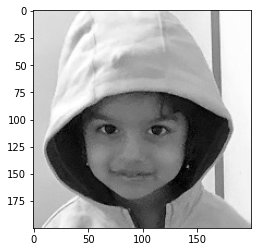

In [4]:
# Cropping the image
img = img[50:250, 40:240]
# Convert image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Show image
plt.imshow(img_gray, cmap='gray')

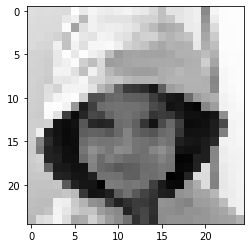

In [5]:
# Reducing the 200x200 image to one of 25x25
img_gray_small = cv2.resize(img_gray, (25, 25))
plt.imshow(img_gray_small, cmap='gray')

In [6]:
img_gray_small

array([[222, 220, 221, 220, 218, 253, 234, 245, 238, 235, 239, 243, 236,
        232, 218, 193, 228, 228, 234, 239, 139, 245, 252, 253, 253],
       [221, 219, 219, 218, 232, 239, 186, 240, 231, 226, 227, 226, 215,
        212, 209, 193, 199, 229, 234, 239, 150, 236, 252, 253, 253],
       [219, 218, 218, 218, 251, 163, 224, 241, 234, 238, 236, 231, 224,
        204, 188, 166, 173, 180, 234, 236, 159, 219, 252, 252, 253],
       [218, 219, 216, 211, 196, 248, 231, 228, 243, 241, 229, 224, 201,
        209, 210, 189, 181, 189, 196, 235, 168, 204, 252, 252, 253],
       [218, 214, 213, 240, 195, 242, 223, 246, 246, 249, 238, 211, 203,
        196, 177, 168, 179, 176, 179, 231, 175, 191, 252, 252, 253],
       [212, 212, 208, 232, 254, 232, 252, 241, 232, 192, 155, 164, 166,
        165, 164, 163, 168, 178, 178, 181, 190, 178, 250, 252, 251],
       [211, 209, 205, 232, 240, 251, 208, 191, 217, 158, 161, 166, 169,
        169, 170, 170, 171, 169, 176, 177, 206, 166, 250, 252, 251],
      

# Inspecting Colored Images

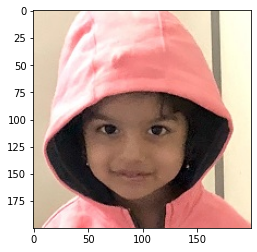

In [7]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [8]:
img.shape

(200, 200, 3)

[[[242 149 141]
  [249 161 151]
  [239 161 148]]

 [[239 145 135]
  [244 150 140]
  [247 159 149]]

 [[239 145 135]
  [242 148 138]
  [245 153 142]]]


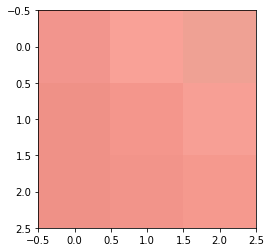

In [9]:
# Bottom-right 3x3 array of pixels
crop = img[-3:, -3:]
print(crop)
plt.imshow(crop)

# Fashion MNIST

In [10]:
# Libraries
import torch
from torchvision import datasets
import numpy as np

In [11]:
data_folder = '/content/FMNIST'
# Downloading only training images
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /content/FMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/FMNIST/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /content/FMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/FMNIST/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /content/FMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/FMNIST/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /content/FMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/FMNIST/FashionMNIST/raw



In [12]:
tr_images = fmnist.data
tr_targets = fmnist.targets

In [13]:
# Inspect the tensors
unique_values = tr_targets.unique()
print(f'tr_images & tr_targets:\n\t \
X: {tr_images.shape}\n\t \
Y: {tr_targets.shape}\n\t \
Y - Unique Values: {unique_values}')
print(f'TASK:\n\t {len(unique_values)} class Classification')
print(f'UNIQUE CLASSES:\n\t {fmnist.classes}')

tr_images & tr_targets:
	 X: torch.Size([60000, 28, 28])
	 Y: torch.Size([60000])
	 Y - Unique Values: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
TASK:
	 10 class Classification
UNIQUE CLASSES:
	 ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


### Plotting a Random Sample of 10 images for All the 10 Possible Classes

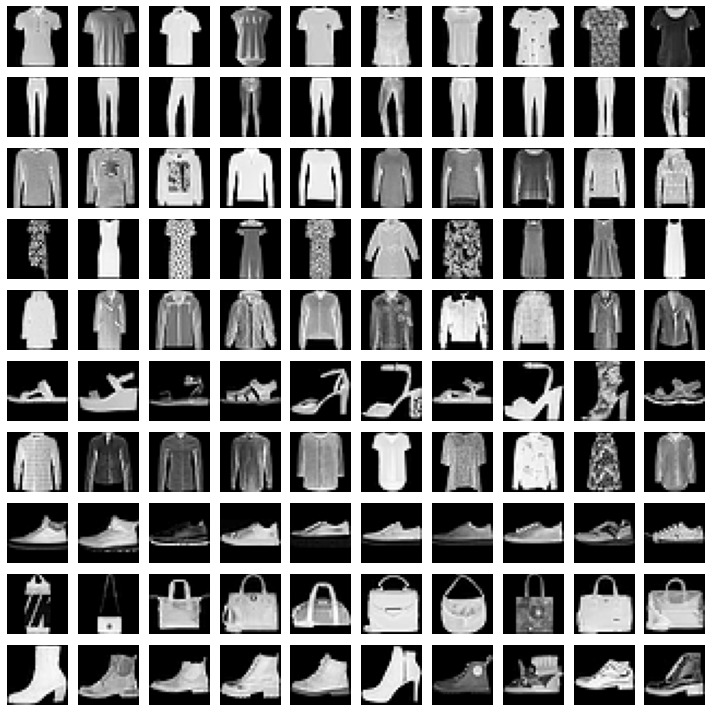

In [14]:
R, C = len(tr_targets.unique()), 10
fig, ax = plt.subplots(R, C, figsize=(10, 10))
for label_class, plot_row in enumerate(ax):
    label_x_rows = np.where(tr_targets == label_class)[0]
    for plot_cell in plot_row:
        plot_cell.grid(False); plot_cell.axis('off')
        ix = np.random.choice(label_x_rows)
        x, y = tr_images[ix], tr_targets[ix]
        plot_cell.imshow(x, cmap='gray')
plt.tight_layout()

## Training

In [15]:
# Libraries
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.optim import SGD, Adam

In [16]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [17]:
tr_images = fmnist.data
tr_targets = fmnist.targets

In [18]:
class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        x = x.float()
        x = x.view(-1, 784)
        self.x, self.y = x, y
    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix]
        return x.to(device), y.to(device)
    def __len__(self):
        return len(self.x)

In [19]:
def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    trn_dl = DataLoader(train, batch_size=32, shuffle=True)
    return trn_dl

In [20]:
def get_model():
    model = nn.Sequential(
        nn.Linear(784, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to(device)
    loss = nn.CrossEntropyLoss()
    optimizer = SGD(model.parameters(), lr=1e-2)
    return model, loss, optimizer

In [21]:
def train_batch(x, y, model, opt, loss):
    model.train()
    prediction = model(x)
    batch_loss = loss(prediction, y)
    batch_loss.backward()
    opt.step()
    opt.zero_grad()
    return batch_loss.item()

In [22]:
# Disable gradient computation
@torch.no_grad()
def accuracy(x, y, model):
    model.eval()
    prediction = model(x)
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()

In [23]:
# Initialize the model, loss, optimizer and DataLoaders
trn_dl = get_data()
model, loss, optimizer = get_model()

In [24]:
# Lists that contain the accuracy and loss values at the end of each epoch
losses, accuracies = [], []

In [25]:
for epoch in range(5):
    print(epoch)
    epoch_losses, epoch_accuracies = [], []
    # Create batches of training data by iterating through the DataLoader
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss)
        epoch_losses.append(batch_loss)
    epoch_loss = np.array(epoch_losses).mean()
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        epoch_accuracies.extend(is_correct)
    epoch_accuracy = np.mean(epoch_accuracies)
    losses.append(epoch_loss)
    accuracies.append(epoch_accuracy)

0
1
2
3
4


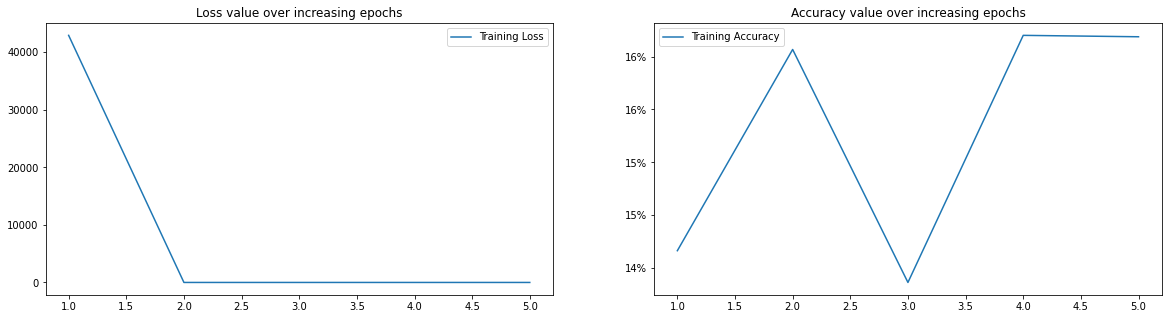

In [26]:
epochs = np.arange(5)+1
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('Loss value over increasing epochs')
plt.plot(epochs, losses, label='Training Loss')
plt.legend()
plt.subplot(122)
plt.title('Accuracy value over increasing epochs')
plt.plot(epochs, accuracies, label='Training Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) \
                           for x in plt.gca().get_yticks()]) 
plt.legend()

In [27]:
class FMNISTDatasetBetter(Dataset):
    def __init__(self, x, y):
        x = x.float() / 255
        x = x.view(-1, 784)
        self.x, self.y = x, y
    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix]
        return x.to(device), y.to(device)
    def __len__(self):
        return len(self.x)

In [28]:
def get_data_better():
    train = FMNISTDatasetBetter(tr_images, tr_targets)
    trn_dl = DataLoader(train, batch_size=32, shuffle=True)
    return trn_dl

In [29]:
trn_dl = get_data_better()
model, loss, optimizer = get_model()

In [30]:
losses, accuracies = [], []

In [31]:
for epoch in range(5):
    print(epoch)
    epoch_losses, epoch_accuracies = [], []
    # Create batches of training data by iterating through the DataLoader
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss)
        epoch_losses.append(batch_loss)
    epoch_loss = np.array(epoch_losses).mean()
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        epoch_accuracies.extend(is_correct)
    epoch_accuracy = np.mean(epoch_accuracies)
    losses.append(epoch_loss)
    accuracies.append(epoch_accuracy)

0
1
2
3
4


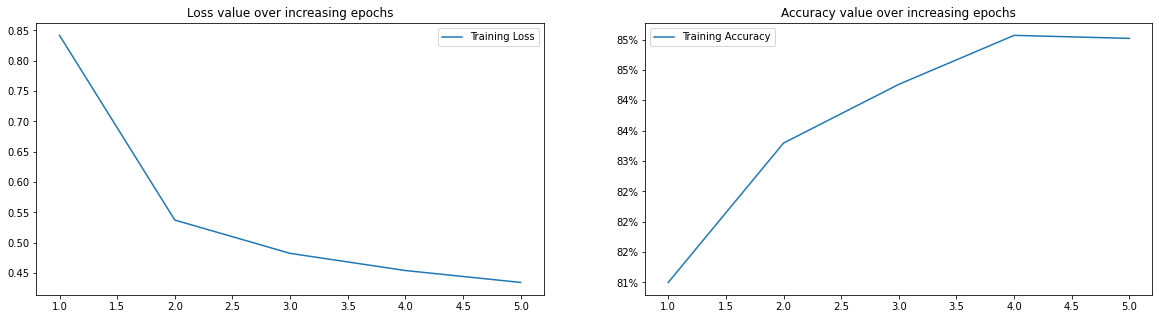

In [32]:
epochs = np.arange(5)+1
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('Loss value over increasing epochs')
plt.plot(epochs, losses, label='Training Loss')
plt.legend()
plt.subplot(122)
plt.title('Accuracy value over increasing epochs')
plt.plot(epochs, accuracies, label='Training Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) \
                           for x in plt.gca().get_yticks()]) 
plt.legend()

# Batch Size and Validation Set

In [33]:
val_fmnist = datasets.FashionMNIST(data_folder, download=True, train=False)
val_images = val_fmnist.data
val_targets = val_fmnist.targets

In [34]:
def get_model_adam():
    model = nn.Sequential(
        nn.Linear(784, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to(device)
    loss = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=1e-2)
    return model, loss, optimizer

In [35]:
def get_data_train_val():
    train = FMNISTDatasetBetter(tr_images, tr_targets)
    trn_dl = DataLoader(train, batch_size=32, shuffle=True)
    val = FMNISTDatasetBetter(val_images, val_targets)
    val_dl = DataLoader(val, batch_size=len(val_images), shuffle=False)
    return trn_dl, val_dl

In [36]:
@torch.no_grad()
def val_loss(x, y, model):
    model.eval()
    prediction = model(x)
    val_loss = loss(prediction, y)
    return val_loss.item()

In [37]:
trn_dl, val_dl = get_data_train_val()
model, loss, optimizer = get_model_adam()

In [38]:
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

0
1
2
3
4


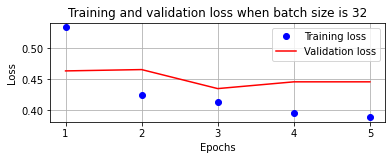

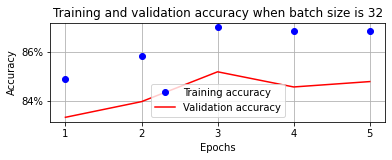

In [39]:
for epoch in range(5):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss)
        train_epoch_losses.append(batch_loss)
        train_epoch_loss = np.array(train_epoch_losses).mean()
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)
epochs = np.arange(5)+1
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss \
when batch size is 32')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', \
         label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', \
         label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy \
when batch size is 32')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) \
                           for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

# Reducing the Learning Rate after a few epochs

In [40]:
from torch import optim

- Reducing the learning rate parameter of optimizer by a factor of 0.5 if a certain value does not improve over the next n epochs (n = 0 (patience)) by a threshold of 0.001

In [41]:
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    factor=0.5,
    patience=0,
    threshold=0.001,
    min_lr=1e-5,
    threshold_mode='abs'
)

In [42]:
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

for epoch in range(30):
    #print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss)
        train_epoch_losses.append(batch_loss) 
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)

    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)
        scheduler.step(validation_loss)         # Scheduler here
    val_epoch_accuracy = np.mean(val_is_correct)

    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

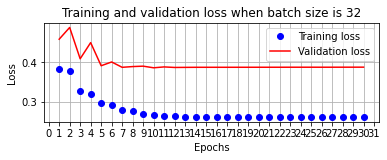

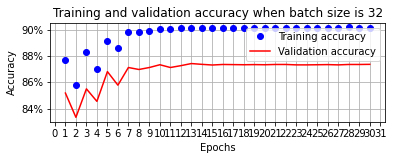

In [44]:
epochs = np.arange(30)+1
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss \
when batch size is 32')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', \
         label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', \
         label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy \
when batch size is 32')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) \
                           for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

# Dropout



```python
def get_model():
    model = nn.Sequential(
                nn.Dropout(0.25),
                nn.Linear(28 * 28, 1000),
                nn.ReLU(),
                nn.Dropout(0.25),
                nn.Linear(1000, 10)
            ).to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=1e-3)
    return model, loss_fn, optimizer
```



# Normalization



```python
def train_batch(x, y, model, opt, loss_fn):
    model.train()
    prediction = model(x)
    l1_regularization = 0
    for param in model.parameters():
        l1_regularization += torch.norm(param,1)
    batch_loss = loss_fn(prediction, y)+0.0001*l1_regularization
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()
```

```python
def train_batch(x, y, model, opt, loss_fn):
    model.train()
    prediction = model(x)
    l2_regularization = 0
    for param in model.parameters():
        l2_regularization += torch.norm(param,2)
    batch_loss = loss_fn(prediction, y) + 0.01*l2_regularization
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()
```



